# Gender Classification

## Data Collection

- The dataset is collected from [kaggle](https://www.kaggle.com/mustafaali96/weight-height).
- The dataset consists of a CSV file name `weight-height.csv`.

- This dataset consists of three columns which is Height, Weight and Gender.
- In this project we are going to classify person's gender based on his/her height and weight.
- Our goal is to train a model with the given data to classify gender.
- Let's look more into the data

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Loading Dataset
wh = pd.read_csv('../data/weight-height.csv')
wh.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
print('Our Data has {} samples.'.format(wh.shape[0]))

Our Data has 10000 samples.


## Feature Engineering

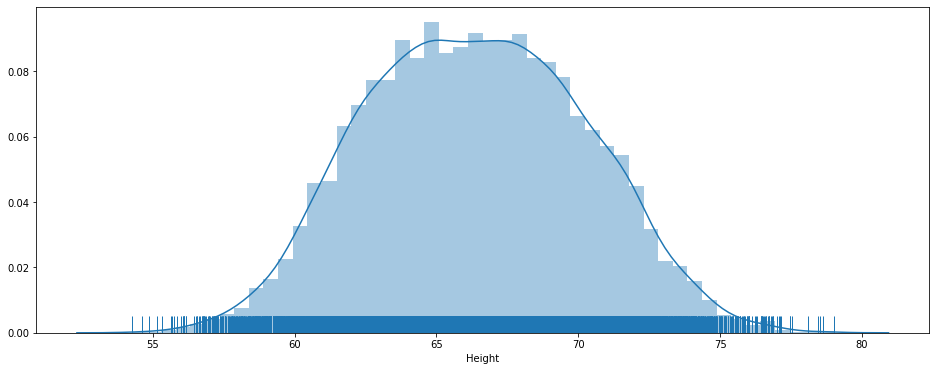

In [6]:
# Let's see the distribution of height
plt.figure(figsize=(16, 6))
sb.distplot(wh['Height'], rug = True)
plt.savefig('../images/height_distribution.png')

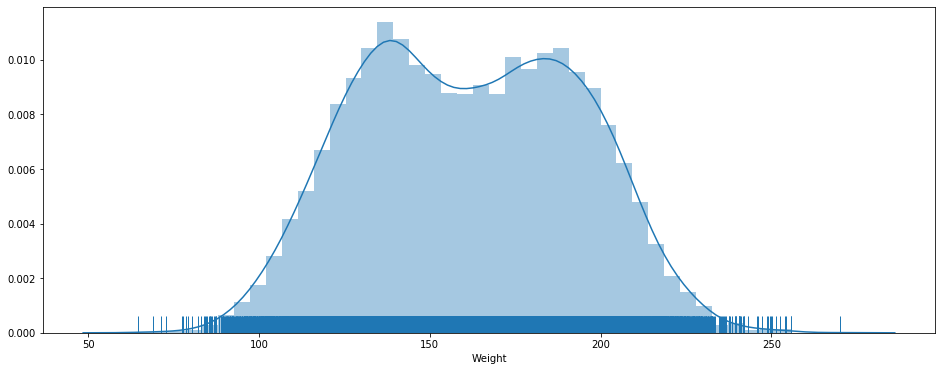

In [7]:
# Let's see the distribution of weight
plt.figure(figsize=(16, 6))
sb.distplot(wh['Weight'], rug = True)
plt.savefig('../images/weight_distribution.png')

<Figure size 1152x432 with 0 Axes>

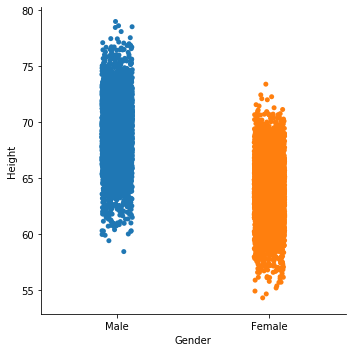

In [8]:
# Let's see the distribution of gender
plt.figure(figsize=(16, 6))
sb.catplot(x = 'Gender', y = 'Height', data = wh)
plt.savefig('../images/gender_height.png')

<Figure size 1152x432 with 0 Axes>

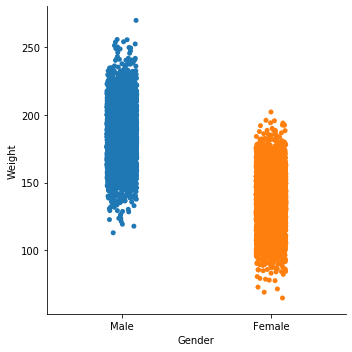

In [9]:
# Let's see the distribution of gender
plt.figure(figsize=(16, 6))
sb.catplot(x = 'Gender', y = 'Weight', data = wh)
plt.savefig('../images/gender_weight.png')

## Feature Observations

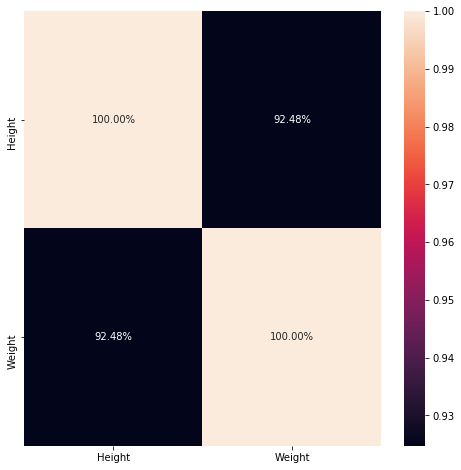

In [13]:
plt.figure(figsize=(8, 8))
sb.heatmap(wh[['Height', 'Weight']].corr(), annot=True, fmt='.2%')
plt.savefig('../images/feature-correlaion.png')

<Figure size 720x576 with 0 Axes>

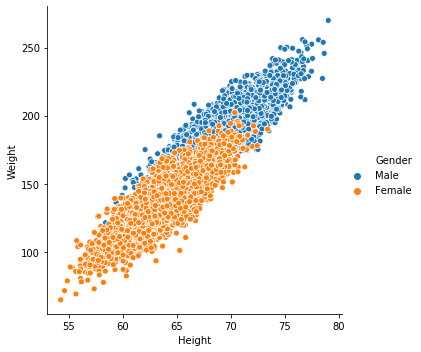

In [14]:
# Let's visualize the dataset
plt.figure(figsize = (10, 8))
sb.relplot(x = 'Height', y = 'Weight', data = wh, hue = 'Gender')
plt.savefig('../images/feature-relations.png')

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X = wh.iloc[:, [1, 2]].values
y = wh.iloc[:, 0].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto', probability = True))
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=True,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [17]:
print("Training Score : ", clf.score(X_train, y_train) * 100)
print("Training Score : ", clf.score(X_test, y_test) * 100)

Training Score :  91.47142857142858
Training Score :  91.9


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

      Female       0.92      0.91      0.92      1463
        Male       0.92      0.92      0.92      1537

    accuracy                           0.92      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.92      0.92      0.92      3000



In [29]:
clf.predict_proba([[64, 152]])

array([[0.80278505, 0.19721495]])